<a href="https://colab.research.google.com/github/Jack-Cruz/Procesamiento_imagen/blob/main/notebook/clase_02_Otzu_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
base = "https://raw.githubusercontent.com/lmcanavals/dip/main/imagenes/"

In [4]:
img = "sudoku.png"
url = f"{base}{img}"
!curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 40726  100 40726    0     0  98610      0 --:--:-- --:--:-- --:--:-- 98610


In [5]:
def show(im, size = 4):
  _, ax = plt.subplots(figsize = (size, size))
  ax.imshow(im, interpolation = "nearest")  
  plt.tight_layout()
  plt.show()

In [6]:
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

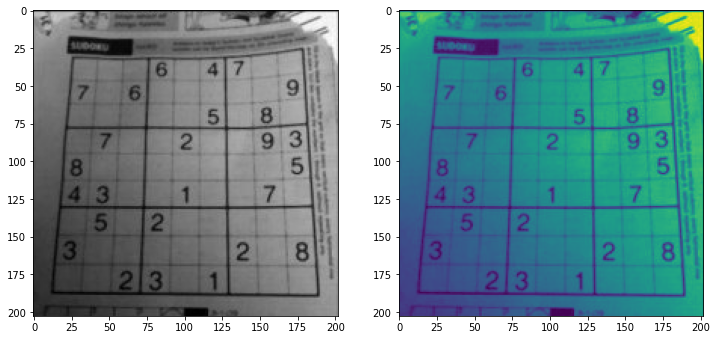

In [26]:
im = loadImg(img)
fig = plt.figure(figsize = (12, 6))

a = fig.add_subplot(1, 2, 1)
plt.imshow(im)

a = fig.add_subplot(1, 2, 2)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # transform to gray
plt.imshow(im)

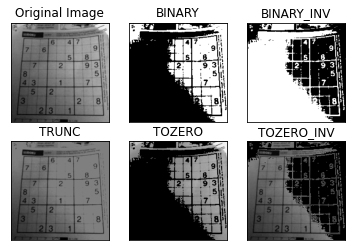

In [27]:
_, thresh1 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(im, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(im, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(im, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ["Original Image", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [im, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
  plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', vmin=0, vmax=255)
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

## Threshold Otzu

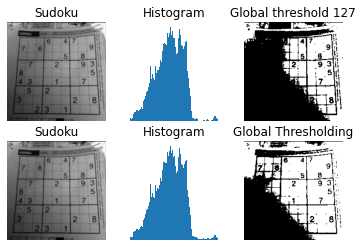

In [32]:
_, th1 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

images = [im, 0, th1,
          im, 0, th2]

titles = ["Sudoku", "Histogram", "Global threshold 127",
          "Sudoku", "Histogram", "Global Thresholding"]

for i in range(2):
  plt.subplot(2, 3, i * 3 + 1)
  plt.imshow(images[i*3], "gray")
  plt.title(titles[i*3])
  plt.axis("off")

  plt.subplot(2, 3, i * 3 + 2)
  plt.hist(images[i*3].ravel(), 256)
  plt.title(titles[i*3 + 1])
  plt.axis("off")

  plt.subplot(2, 3, i * 3 + 3)
  plt.imshow(images[i*3 + 2], "gray")
  plt.title(titles[i*3 + 2])
  plt.axis("off")